In [51]:
import math
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

In [2]:
statevec_simulator = q.Aer.get_backend('statevector_simulator')
qasm_sim = q.Aer.get_backend('qasm_simulator')

In [32]:
def do_job(circuit):
    """
    Given a circuit, executes jobs using our statevector simulator
    and the qasm simulator.
    
    """
    
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    statevec = result.get_statevector()
    
    n_qubits = circuit.num_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=5000).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [33]:
# as of now this circuit does nothing but initialize qubits and cbits.
# Given that there are no gates interacting with the circuit, both 
# qubits should remain as 0.

circuit = q.QuantumCircuit(2,2)

In [34]:
statevec, counts = do_job(circuit)

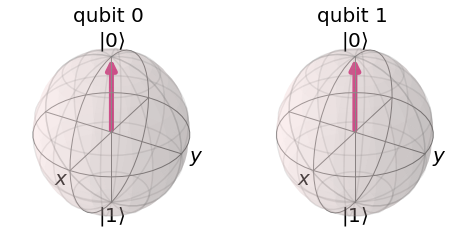

In [35]:
# Now we can see our qubits represented by vectors in a bloch sphere.
# both qubit0 and qubit1 are perpendicular to the x-y plane, aproaching z=0

plot_bloch_multivector(statevec)

What if we added a Hadamard gate? We know this puts the qubit into 
superposition, but what does that look like?

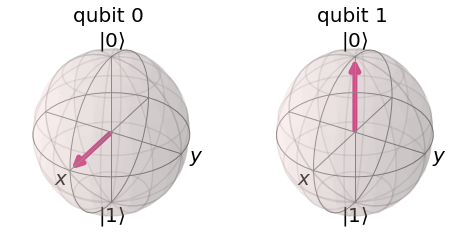

In [36]:
circuit = q.QuantumCircuit(2,2)
circuit.h(0)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

what if we entangled qubit 0 and 1 using a cnot gate?

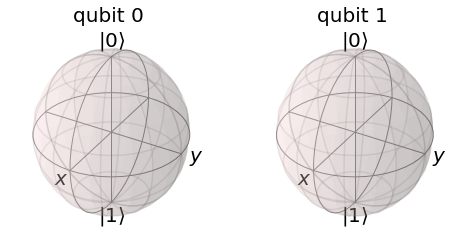

In [37]:
circuit = q.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

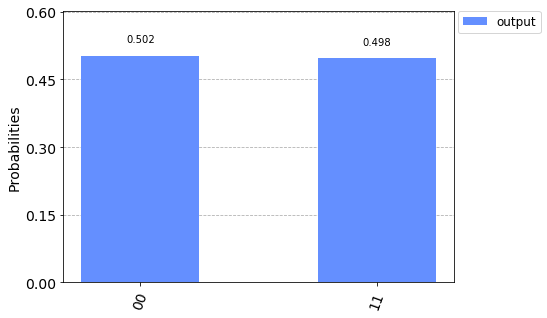

In [38]:
plot_histogram([counts], legend=['output'])

Alright, so far we have only been playing with 2 qubits at a time. What if we had qubits where qubit 2 was controlled by qubit 0 and qubit 1, which are both in superposition?

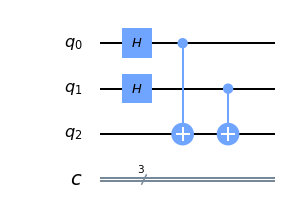

In [39]:
circuit = q.QuantumCircuit(3,3)

# putting qubits 0 and 1 in superposition
circuit.h(0)
circuit.h(1)

# entangling qubits 0 and 1 to qubit 2
circuit.cx(0,2)
circuit.cx(1,2)


circuit.draw(output='mpl')

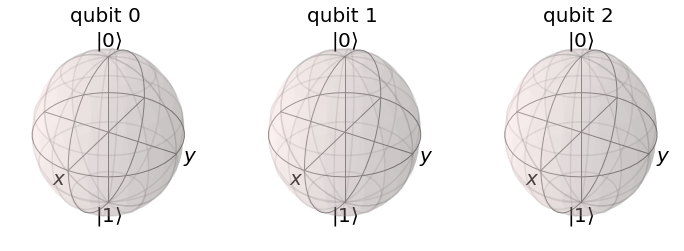

In [40]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

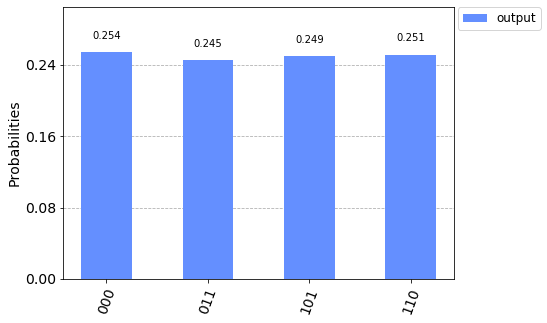

In [41]:
plot_histogram([counts], legend=['output'])

Ok so that didn't quite work. But qiskit comes with a controlled-controlled-not-gate for a ccx gate that does allow us to assign two control qubits (0 and 1) to a single qubit (2).

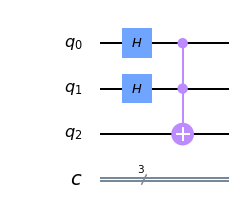

In [42]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)

circuit.ccx(0, 1, 2)

circuit.draw(output='mpl')

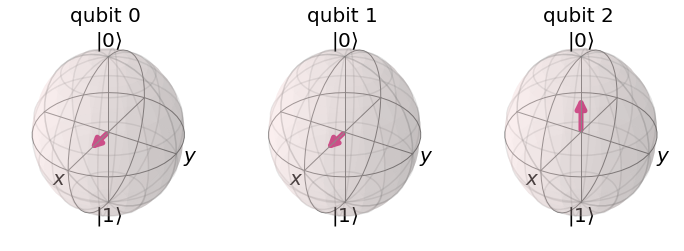

In [43]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

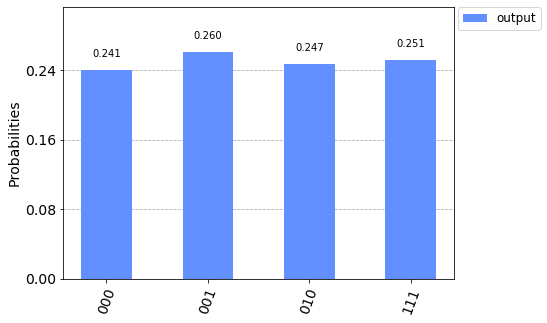

In [44]:
plot_histogram([counts], legend=['output'])

We don't always need to have a 1:1 matching number of qubits to bits. As a matter of fact, in most applications, we are going to use many more qubits that cbits.

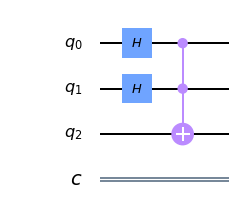

In [46]:
# 3 qubits, 1 cbit
circuit = q.QuantumCircuit(3, 1)

circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw(output='mpl')

Ok, what if we measured qubit 2 to classical bit 0, right now?

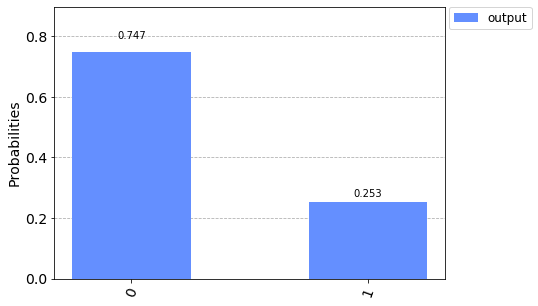

In [47]:
circuit.measure([2], [0])
result = q.execute(circuit, backend=qasm_sim, shots=5000).result()

counts = result.get_counts()
plot_histogram([counts], legend=['output'])

What this says here, is that in the current state, cbit 0 has a 25.3% chance of being a 1, and a 74.7% chance of being a 0.

If you think of each gate that we applied as a split, or a coin flip, then after the first gate, there is a 50/50 chance that cbit 0 is a 0 or 1. After the second gate, we apply another 50/50 chance, which stands to reason why we get 1 with a roughly 25% probability.

## Axis Rotation

We can also apply rotations to a given axis, which may or may not impact the actual measured values, but combinations of these gates, superpositions and entanglements combined can produce very interesting results!

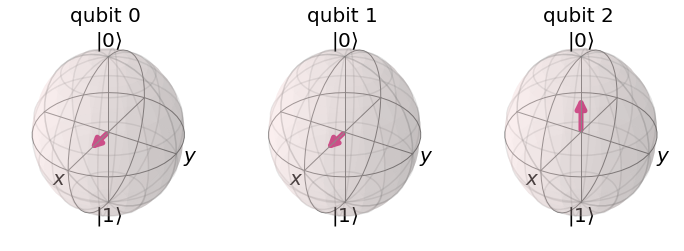

In [52]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)  
circuit.h(1)  
circuit.ccx(0,1,2)  

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

Let's rotate the xaxis for qubit 2

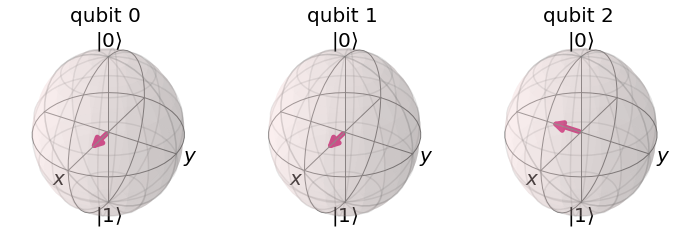

In [55]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)

circuit.rx(theta=math.pi/2, qubit=2)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

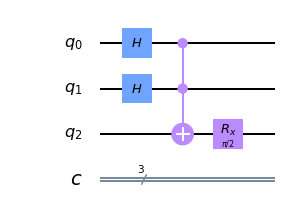

In [64]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)

circuit.rx(theta=math.pi/2, qubit=2)
circuit.draw(output='mpl')

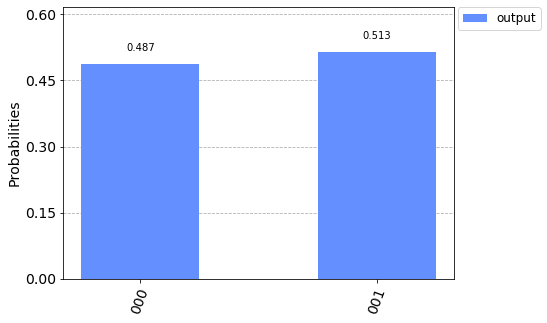

In [65]:
circuit.measure([2], [0])
result = q.execute(circuit, backend=qasm_sim, shots=5000).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])

Ok, so after setting qubit 2 to be controlled by the superpositioned qubits 0 and 1, and applying an x-axis rotation of $\pi$/2 it looks like we are back to qubit 2, having a 50/50 chance of being 0 or 1...

But what if we didn't use nice rounded numbers?

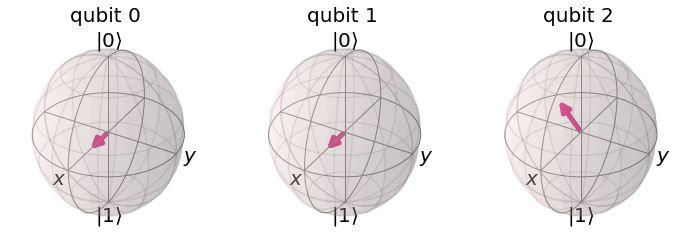

In [66]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)

circuit.rx(theta=math.pi/4, qubit=2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

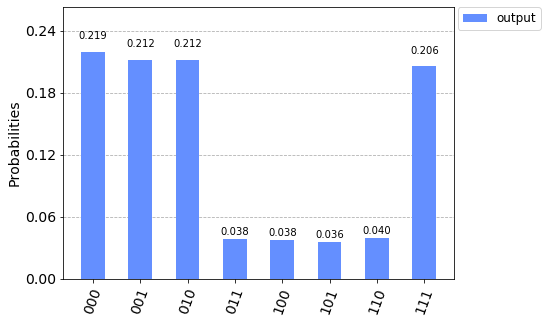

In [68]:
plot_histogram([counts], legend=['output'])

Keep in mind this is just a simulated-perfect quantum machine with little  to no error. And we have 8 total possible outcomes. 8 outcomes makes sense since we have 2 possible outcomes (0 or 1) and 3 total qubits (0, 1, 2) 

$2^3$ = 8

What if we rotated on multiple axes?

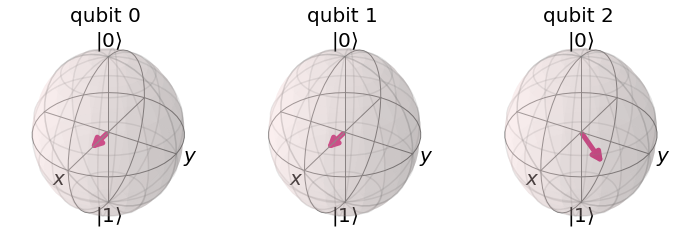

In [69]:
circuit = q.QuantumCircuit(3,3)
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.rx(math.pi/4, 2)
circuit.ry(math.pi, 2)
circuit.rz(math.pi, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

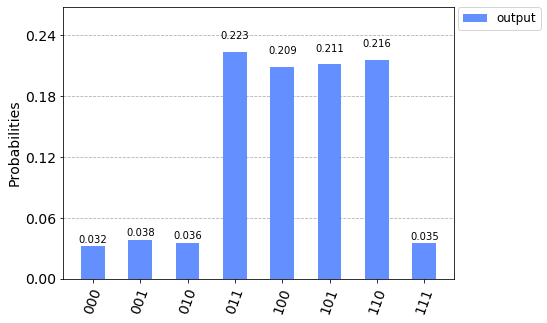

In [71]:
plot_histogram([counts], legend=['output'])

We can use gates to manipulate these vectors, and the underlying qubits!

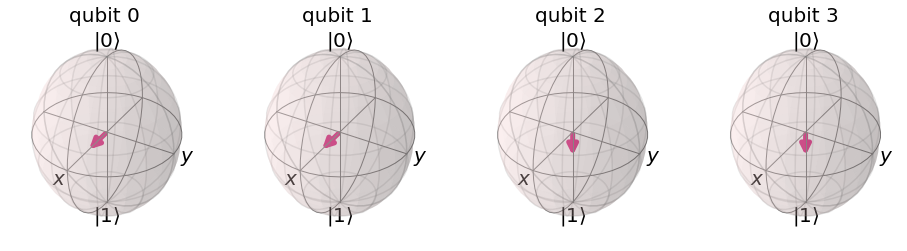

In [73]:
circuit = q.QuantumCircuit(4,4)
circuit.h(0)  
circuit.h(1)  

circuit.ccx(0,1,2)  
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)

# here we make qubit 3 depend on qubit 2's position, which is dependent on 
# qubits 0 and 1!
circuit.cx(2, 3)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

The order of these gates matters! They are definitely not interchangeable. Take a look at what happens if I make qubit 3 depend on qubit 2 and then entangle qubit 2 to qubits 0 and 1

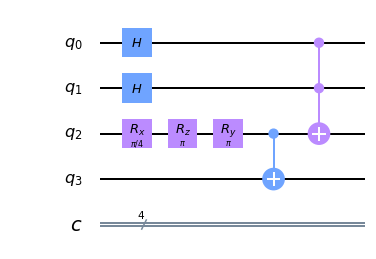

In [78]:
circuit = q.QuantumCircuit(4,4)
circuit.h(0)
circuit.h(1)
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)

circuit.ccx(0,1,2)
circuit.draw(output='mpl')

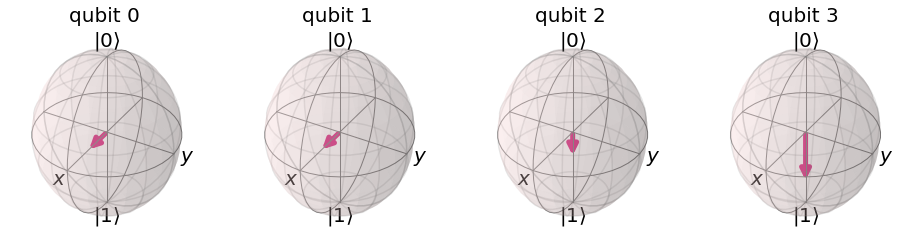

In [79]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

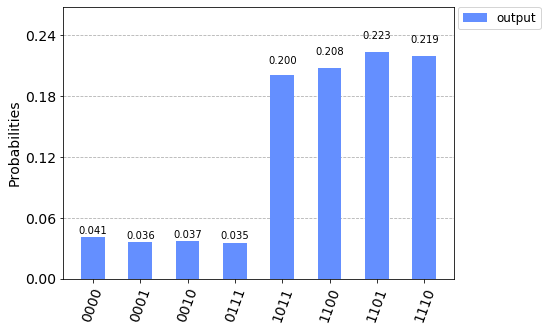

In [80]:
plot_histogram([counts], legend=['output'])